# Y3-A1-v29 TESTS

## Some processing functions

In [72]:
def plotRaDec2D(filename, field, title, cmap_name, markersize, colorlog): 
    import fitsio
    import matplotlib
    import matplotlib.pyplot as plt
    from astropy.coordinates import SkyCoord
    from astropy import units
    import numpy as np
    from matplotlib.colors import LogNorm
    %matplotlib inline
    
    data = fitsio.read(filename)
    data = data.astype(data.dtype.newbyteorder('='))
    
    data1 = data[data[field]>0]
    coords = SkyCoord(ra=data1['telra'], dec=data1['teldec'], unit='degree')
    ra = coords.ra.wrap_at(180 * units.deg)
    #ra = coords.ra.radian
    dec = coords.dec
    rho2p = data1[field]

    data2 = data[data[field]<0]
    coords2 = SkyCoord(ra=data2['telra'], dec=data2['teldec'], unit='degree')
    ra2 = coords2.ra.wrap_at(180 * units.deg)
    #ra = coords.ra.radian
    dec2 = coords2.dec 
    mdatan = [ -x for x in data2[field]]

    fig = plt.figure(figsize=(10,6))
    
    if(colorlog):
        sct = plt.scatter(ra, dec, s=markersize, marker='s' , cmap=cmap_name, c=rho2p, 
                      norm=LogNorm( vmin=np.nanmin(rho2p), vmax=np.nanmax(rho2p))  )
        plt.scatter(ra2, dec2, s=markersize, marker='p' , cmap=cmap_name, c=mdatan, 
                norm=LogNorm( vmin=np.nanmin(rho2p), vmax=np.nanmax(rho2p))   )
    else:
        sct = plt.scatter(ra, dec, s=markersize, marker='s' , cmap=cmap_name, c=rho2p )
        plt.scatter(ra2, dec2, s=markersize, marker='p' , cmap=cmap_name, c=mdatan)

    plt.colorbar(sct)
    plt.xlabel('R.A')
    plt.ylabel('DEC')
    plt.title(title)
    plt.show()

In [73]:
def plotScatterRho(filename, field, xtitle, ytitle, title, xlog=False, ylog=True, grid=True, savefig=False):
    import fitsio
    import matplotlib 
    import matplotlib.pyplot as plt
    from astropy.coordinates import SkyCoord
    from astropy import units
    import numpy as np
    %matplotlib inline

    data = fitsio.read(filename)
    data = data.astype(data.dtype.newbyteorder('='))
    
    ignore =  (data[field] ==-999.) |  (data[field] == None) | ( np.isnan(data[field])) 
    data = data[~ignore]
    datap = data[(data['mrho2p']>0)]
    datan = data[(data['mrho2p']<0)]
    mdatan = [ -x for x in datan['mrho2p']]

    plt.figure(figsize=(10,6))
    plt.plot( datap[field] , datap['mrho2p'] , color='blue', marker= 'o',  markersize=5,  linewidth=0 )
    plt.plot( datan[field] , mdatan  , color='black', marker= 'o',  markersize=5,  linewidth=0 )

    if(ylog):
        plt.yscale('log')
    if(xlog):
        plt.xscale('log')
    if(grid): 
        plt.grid()
    plt.xlabel(xtitle)
    plt.ylabel(ytitle)
    plt.title(title)
    if(savefig):
        plt.savefig('mrho2p'+'_vs_'+field +'__'+filename[:-5]+'.pdf', dpi=150)

In [74]:
def plotScatter(filename, xfield, yfield, xtitle, ytitle, title, xlog=False, ylog=False, grid=True, savefig=False):
    import fitsio
    import matplotlib 
    import matplotlib.pyplot as plt
    from astropy.coordinates import SkyCoord
    from astropy import units
    import numpy as np
    %matplotlib inline

    data = fitsio.read(filename)
    data = data.astype(data.dtype.newbyteorder('='))
    
    ignorex =  (data[xfield] ==-999.) |  (data[xfield] == None) | ( np.isnan(data[xfield])) 
    data = data[~ignorex]
    ignorey =  (data[yfield] ==-999.) |  (data[yfield] == None) | ( np.isnan(data[yfield])) 
    data = data[~ignorey]
 

    plt.figure(figsize=(10,6))
    plt.plot( data[xfield] , data[yfield] , color='blue', marker= 'o',  markersize=5,  linewidth=0 )

    if(ylog):
        plt.yscale('log')
    if(xlog):
        plt.xscale('log')
    if(grid): 
        plt.grid()
    plt.xlabel(xtitle)
    plt.ylabel(ytitle)
    plt.title(title)
    if(savefig):
        plt.savefig(yfield+'_vs_'+xfield +'__'+filename[:-5]+'.pdf', dpi=150)   

In [75]:
def ccd_llcoordinates():
    import numpy

    # Centers of chips in focal plane coordinates
    N7=["N7",16.908,191.670]
    N6=["N6",16.908,127.780]
    N5=["N5",16.908,63.890]
    N4=["N4",16.908,0.]
    N3=["N3",16.908,-63.890]
    N2=["N2",16.908,-127.780]
    N1=["N1",16.908,-191.670]

    N13=["N13",50.724,159.725]
    N12=["N12",50.724,95.835]
    N11=["N11",50.724,31.945]
    N10=["N10",50.724,-31.945]
    N9=["N9",50.724,-95.835]
    N8=["N8",50.724,-159.725]

    N19=["N19",84.540,159.725]
    N18=["N18",84.540,95.835]
    N17=["N17",84.540,31.945]
    N16=["N16",84.540,-31.945]
    N15=["N15",84.540,-95.835]
    N14=["N14",84.540,-159.725]

    N24=["N24",118.356,127.780]
    N23=["N23",118.356,63.890]
    N22=["N22",118.356,0.]
    N21=["N21",118.356,-63.890]
    N20=["N20",118.356,-127.780]

    N28=["N28",152.172,95.835]
    N27=["N27",152.172,31.945]
    N26=["N26",152.172,-31.945]
    N25=["N25",152.172,-95.835]

    N31=["N31",185.988,63.890]
    N30=["N30",185.988,0.]
    N29=["N29",185.988,-63.890]

    S7=["S7",-16.908,191.670]
    S6=["S6",-16.908,127.780]
    S5=["S5",-16.908,63.890]
    S4=["S4",-16.908,0.]
    S3=["S3",-16.908,-63.890]
    S2=["S2",-16.908,-127.780]
    S1=["S1",-16.908,-191.670]

    S13=["S13",-50.724,159.725]
    S12=["S12",-50.724,95.835]
    S11=["S11",-50.724,31.945]
    S10=["S10",-50.724,-31.945]
    S9=["S9",-50.724,-95.835]
    S8=["S8",-50.724,-159.725]

    S19=["S19",-84.540,159.725]
    S18=["S18",-84.540,95.835]
    S17=["S17",-84.540,31.945]
    S16=["S16",-84.540,-31.945]
    S15=["S15",-84.540,-95.835]
    S14=["S14",-84.540,-159.725]

    S24=["S24",-118.356,127.780]
    S23=["S23",-118.356,63.890]
    S22=["S22",-118.356,0.]
    S21=["S21",-118.356,-63.890]
    S20=["S20",-118.356,-127.780]

    S28=["S28",-152.172,95.835]
    S27=["S27",-152.172,31.945]
    S26=["S26",-152.172,-31.945]
    S25=["S25",-152.172,-95.835]

    S31=["S31",-185.988,63.890]
    S30=["S30",-185.988,0.]
    S29=["S29",-185.988,-63.890]

    # order of chips when using numeric label
    ccdid = [S29,S30,S31,S25,S26,S27,S28,S20,S21,S22,S23,S24,S14,S15,S16,S17,S18,S19,S8,S9,S10,S11,S12,S13,S1,S2,S3,S4,S5,S6,S7,N1,N2,N3,N4,N5,N6,N7,N8,N9,N10,N11,N12,N13,N14,N15,N16,N17,N18,N19,N20,N21,N22,N23,N24,N25,N26,N27,N28,N29,N30,N31]

    # defines the size of a chip in mm.  One pixel=15 microns
    xsize=2048*15e-6*1000
    ysize=4096*15e-6*1000

    # xc, yc are the (x,y) position of the lower left corner of each chip
    xc = numpy.empty(len(ccdid)+1)
    yc = numpy.empty(len(ccdid)+1)
    for i,ext in enumerate(ccdid):
        xc[i+1] = ext[1]-xsize/2
        yc[i+1] = ext[2]-ysize/2
    return xc, yc
    

In [76]:
def plotCCD2D(filename, field, title, cmap_name):
    import matplotlib
    import matplotlib.pyplot as plt
    from matplotlib.collections import PatchCollection
    from matplotlib.patches import Rectangle
    import numpy as np
    import fitsio
    %matplotlib inline

    xsize=2048*15e-6*1000
    ysize=4096*15e-6*1000
    
    BAD_CCDS = [2, 31, 61]

    data = fitsio.read(filename)
    data = data.astype(data.dtype.newbyteorder('='))
    mask = ~np.in1d(data['ccdnum'], BAD_CCDS)
    data = data[mask]
    absmrhop2 =   np.array([ abs(x) for x in data[field]])
    ccdpatches = []    #k =0
    
    xc,yc = ccd_llcoordinates()
    for x1,y1, k in zip(xc, yc,  list(range(0, 63))):
        #print(k, x1, y1)
        if (k in BAD_CCDS):
            continue
        else:
            rect = Rectangle((x1, y1), xsize, ysize)
            ccdpatches.append(rect)
            
    fig, ax = plt.subplots(figsize=(10,6))

    ax.set_xlim([-220, 220])
    ax.set_ylim([-260, 260])
    p = PatchCollection(ccdpatches, cmap=cmap_name,  norm=matplotlib.colors.LogNorm())
    p.set_array(absmrhop2)
    ax.add_collection(p)
    plt.colorbar(p)
    plt.title(title)

In [77]:
def readrho2fromjson(filename):    
    import os
    import json
    import numpy
    with open(filename,'r') as f:
        stats = json.load(f)
    if len(stats) == 1:  # I used to save a list of length 1 that in turn was a list
            stats = stats[0]

    ( meanlogr,rho1p, rho1p_im, rho1m, rho1m_im, var1,rho2p, rho2p_im, rho2m,
          rho2m_im, var2, rho3p, rho3p_im,rho3m, rho3m_im,
          var3, rho4p, rho4p_im, rho4m, rho4m_im, var4, rho5p, rho5p_im,
          rho5m, rho5m_im, var5,
        ) = stats[:26]

    #Finally this are the arrays with the data
    meanr = numpy.exp(meanlogr)
    rho1p = numpy.array(rho1p)
    rho1m = numpy.array(rho1m)
    rho2p = numpy.array(rho2p)
    rho2m = numpy.array(rho2m)
    rho3p = numpy.array(rho3p)
    rho3m = numpy.array(rho3m)
    rho4p = numpy.array(rho4p)
    rho4m = numpy.array(rho4m)
    rho5p = numpy.array(rho5p)
    rho5m = numpy.array(rho5m)
    sig_rho1 = numpy.sqrt(var1)
    sig_rho2 = numpy.sqrt(var2)
    sig_rho3 = numpy.sqrt(var3)
    sig_rho4 = numpy.sqrt(var4)
    sig_rho5 = numpy.sqrt(var5)
    sqrtn = 1
        
    return meanr,rho2p, sig_rho2, sqrtn

In [78]:
def pretty_rho2(meanr, rho, sig, sqrtn,figcolor):
    import matplotlib
    import matplotlib.pyplot as plt
    
    plt.plot(meanr, rho, color=figcolor)
    plt.plot(meanr, -rho, color=figcolor, ls=':')
    plt.errorbar(meanr[rho>0], rho[rho>0], yerr=sig[rho>0]/sqrtn, color=figcolor, ls='', marker='o')
    plt.errorbar(meanr[rho<0], -rho[rho<0], yerr=sig[rho<0]/sqrtn, color=figcolor, ls='', marker='o')

## DES FOOTPRINT

2D Color map on the DES footprint. Each field defines a different array of values for the color bar. If the shape of the zone is an hexagon means that the mean value of the field was negative, and we took the absolute value to plot properly a log-scale

In [79]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import numpy as np

In [80]:
filenames=['rho2pbyzones.fits', 'rho2pbyexposure.fits']
cmaps=['gnuplot','seismic','Greys','tab20','tab20b','tab20c', 'ocean']
columns =  ['mrho2p','airmass',  'dimmseeing',  'dT', 'fwhm', 'humidity', 'msurtemp',  'outtemp', 'sat',  'sigsky',  
           'sky',  'teldec', 'telha',  'telra',  'tiling',  'mtotalstars',  'musestars' ,  'winddir',  'windspd',
            'mean_obs_e1', 'mean_obs_e2', 'mean_obs_e', 'mean_obs_epw2', 'mean_piff_e1','mean_piff_e2', 
            'mean_piff_e', 'mean_piff_epw2', 'mean_de1',  'mean_de2', 'mean_de','mean_depw2']
units =  ['',' ', ' [arcsec]', ' [Celcius]', ' ',  ' [%]', ' [Celsius]', ' [Celsius]', ' ', ' ', ' ', 
          ' [deg]', '  [deg]',' [deg]', ' ', ' ',  '  ', ' [deg]',  ' [m/s]', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 
          ' ', ' ',  ' ', ' ', ''  ]
xtitles= np.core.defchararray.add(np.array(columns),np.array(units))

In [81]:
wfilename = widgets.Dropdown(description='filename', options=filenames)
#fields=['mrho2p','musestars','mtotalstars']
titles=['BY ZONE', 'BY EXPOSURE']
wtitles = widgets.Dropdown(description='titles', options=titles)
wmarkersize = widgets.IntSlider(value=100, min=5,max = 105,step=20)
markervalues=[100,5]
#wtitles.layout.visibility = 'hidden'
wtitles.layout.display = 'none'
def changemarkersize(change):
    wmarkersize.value=  markervalues[wfilename.index]
    wtitles.value=  titles[wfilename.index]
wfilename.observe(changemarkersize, names='value')
g = interactive(plotRaDec2D, filename=wfilename, field = columns, title=wtitles,
                cmap_name=cmaps,markersize=wmarkersize, colorlog=True )
display(g)

interactive(children=(Dropdown(description='filename', options=('rho2pbyzones.fits', 'rho2pbyexposure.fits'), …

## Analysis in FOV

In [82]:
filenames2 = ['rho2pbyccd_allzones.fits', 'rho2pbyccd_zone80.fits']
columnsccd =  ['mrho2p','mean_obs_e1', 'mean_obs_e2', 'mean_obs_e', 'mean_obs_epw2', 'mean_piff_e1','mean_piff_e2', 
            'mean_piff_e', 'mean_piff_epw2', 'mean_de1',  'mean_de2', 'mean_de','mean_depw2']
z=interactive(plotCCD2D, filename=filenames2, field=columnsccd, title=fixed('Focal plane'), cmap_name = cmaps)
display(z)

interactive(children=(Dropdown(description='filename', options=('rho2pbyccd_allzones.fits', 'rho2pbyccd_zone80…

## Rho2 Scatter plots 

In [83]:
wfilename3 = widgets.Dropdown(description='filename', options=filenames)
wtitles3 = widgets.Dropdown(description='titles', options=titles)
def changetitle(change):
    wtitles3.value=  titles[wfilename3.index]
wfilename3.observe(changetitle, names='value')
wtitles3.layout.display = 'none'

wfields3 = widgets.Dropdown(description='fields', options=columns)
wxtitles3 = widgets.Dropdown(description='xtitles',options= xtitles)
def on_value_change(change):
    wxtitles3.value=  xtitles[wfields3.index]
wfields3.observe(on_value_change, names='value')
wxtitles3.layout.display = 'none'

wsavebool3 =widgets.ToggleButton(
    value=False,
    description='Savefig',
    disabled=False,
    button_style='success', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Description',
    icon='check'
)

w=interactive(plotScatterRho, filename=wfilename3, field =wfields3, xtitle=wxtitles3 ,ytitle=fixed('mrho2p')
              , title=wtitles3, xlog=False ,ylog=True, grid=True, savefig=wsavebool3 )

display(w)

interactive(children=(Dropdown(description='filename', options=('rho2pbyzones.fits', 'rho2pbyexposure.fits'), …

## Some physical variables scatter plots

In [84]:
wfilename4 = widgets.Dropdown(description='filename', options=filenames)
wtitles4 = widgets.Dropdown(description='titles', options=titles)
wtitles4.layout.display = 'none'
def changetitle(change):
    wtitles4.value=  titles[wfilename4.index]
wfilename4.observe(changetitle, names='value')

wyfields4 = widgets.Dropdown(description='y-field', options=columns)
wytitles4 = widgets.Dropdown(description='y-title',options= xtitles)
def on_value_changey(change):
    wytitles4.value=  xtitles[wyfields4.index]
wyfields4.observe(on_value_changey, names='value')
wytitles4.layout.display = 'none'

wxfields4 = widgets.Dropdown(description='x-field', options=columns)
wxtitles4 = widgets.Dropdown(description='x-title',options= xtitles)
def on_value_changex(change):
    wxtitles4.value=  xtitles[wxfields4.index]
wxfields4.observe(on_value_changex, names='value')
wxtitles4.layout.display = 'none'

wsavebool4 =widgets.ToggleButton(
    value=False,
    description='Savefig',
    disabled=False,
    button_style='success', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Description',
    icon='check'
)

w4=interactive(plotScatter, filename=wfilename4, xfield =wxfields4, yfield =wyfields4, xtitle=wxtitles4 ,
               ytitle=wytitles4, title=wtitles4, xlog=False ,ylog=False, grid=True, savefig= wsavebool4 )
display(w4)

interactive(children=(Dropdown(description='filename', options=('rho2pbyzones.fits', 'rho2pbyexposure.fits'), …

## Rho2 desconsidering stars depending on his observed ellipticities
 

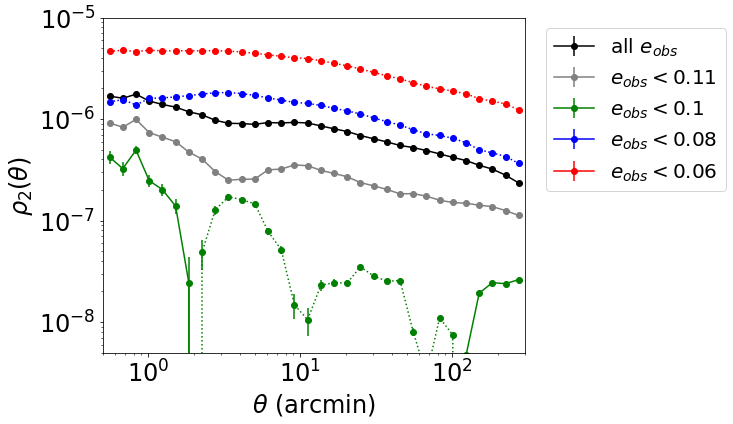

In [85]:
meanr,rho2p, sig_rho2, sqrtn= readrho2fromjson("json/test2/allzones_rho_all_irz.json")
meanr_1,rho2p_1, sig_rho2_1, sqrtn_1 = readrho2fromjson("json/test2/allzones_e0.1_rho_all_irz.json")
meanr_2,rho2p_2, sig_rho2_2, sqrtn_2 = readrho2fromjson("json/test2/allzones_e0.06_rho_all_irz.json")
meanr_3,rho2p_3, sig_rho2_3, sqrtn_3 = readrho2fromjson("json/test2/allzones_e0.08_rho_all_irz.json")
meanr_4,rho2p_4, sig_rho2_4, sqrtn_4 = readrho2fromjson("json/test2/allzones_e0.11_rho_all_irz.json")

%matplotlib inline
import matplotlib.pyplot as plt
fig=plt.figure(1,figsize=(12,6))

pretty_rho2(meanr, rho2p, sig_rho2, sqrtn,figcolor='black')
pretty_rho2(meanr_1, rho2p_1, sig_rho2_1, sqrtn_1,figcolor='green')
pretty_rho2(meanr_2, rho2p_2, sig_rho2_2, sqrtn_2,figcolor='red')
pretty_rho2(meanr_3, rho2p_3, sig_rho2_3, sqrtn_3,figcolor='blue')
pretty_rho2(meanr_4, rho2p_4, sig_rho2_4, sqrtn_3,figcolor='gray')


rho2_line = plt.errorbar(-meanr, rho2p, yerr=sig_rho2, color='black', marker='o')
rho2_line_1 = plt.errorbar(-meanr_1, rho2p_1, yerr=sig_rho2_1, color='green', marker='o')
rho2_line_2 = plt.errorbar(-meanr_2, rho2p_2, yerr=sig_rho2_2, color='red', marker='o')
rho2_line_3 = plt.errorbar(-meanr_3, rho2p_3, yerr=sig_rho2_3, color='blue', marker='o')
rho2_line_4 = plt.errorbar(-meanr_4, rho2p_4, yerr=sig_rho2_4, color='gray', marker='o')

plt.legend([rho2_line, rho2_line_4, rho2_line_1, rho2_line_3 , rho2_line_2  ],
           ['all '+r'$e_{obs}$', r'$e_{obs}<0.11$',r'$e_{obs}<0.1$', r'$e_{obs}<0.08$',r'$e_{obs}<0.06$'], 
           loc='upper right', fontsize=20, bbox_to_anchor=(1.5,1.0))#bbox_to_anchor=(0.5,-0.1)
plt.ylim( [5.e-9, 1.e-5] )   
plt.tick_params(axis='both', which='major', labelsize=24)
plt.xlim( [0.5,300.] )
plt.xlabel(r'$\theta$ (arcmin)', fontsize=24)
plt.ylabel(r'$\rho_{2}(\theta)$', fontsize=24)
plt.xscale('log')
plt.yscale('log', nonposy='clip')
plt.tight_layout()
#plt.savefig('rho2p_y3a1-v29_neglecting_stars.pdf', dpi=150)   

## Rho2 desconsidering stars depending on his modelled ellipticities

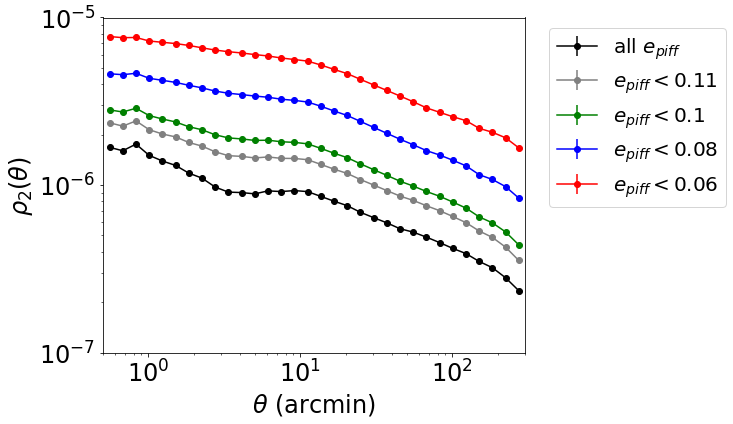

In [86]:
meanr,rho2p, sig_rho2, sqrtn= readrho2fromjson("json/test2b/allzones_rho_all_irz.json")
meanr_1,rho2p_1, sig_rho2_1, sqrtn_1 = readrho2fromjson("json/test2b/allzones_ep0.1_rho_all_irz.json")
meanr_2,rho2p_2, sig_rho2_2, sqrtn_2 = readrho2fromjson("json/test2b/allzones_ep0.06_rho_all_irz.json")
meanr_3,rho2p_3, sig_rho2_3, sqrtn_3 = readrho2fromjson("json/test2b/allzones_ep0.08_rho_all_irz.json")
meanr_4,rho2p_4, sig_rho2_4, sqrtn_4 = readrho2fromjson("json/test2b/allzones_ep0.11_rho_all_irz.json")

%matplotlib inline
import matplotlib.pyplot as plt
fig=plt.figure(1,figsize=(12,6))

pretty_rho2(meanr, rho2p, sig_rho2, sqrtn,figcolor='black')
pretty_rho2(meanr_1, rho2p_1, sig_rho2_1, sqrtn_1,figcolor='green')
pretty_rho2(meanr_2, rho2p_2, sig_rho2_2, sqrtn_2,figcolor='red')
pretty_rho2(meanr_3, rho2p_3, sig_rho2_3, sqrtn_3,figcolor='blue')
pretty_rho2(meanr_4, rho2p_4, sig_rho2_4, sqrtn_3,figcolor='gray')


rho2_line = plt.errorbar(-meanr, rho2p, yerr=sig_rho2, color='black', marker='o')
rho2_line_1 = plt.errorbar(-meanr_1, rho2p_1, yerr=sig_rho2_1, color='green', marker='o')
rho2_line_2 = plt.errorbar(-meanr_2, rho2p_2, yerr=sig_rho2_2, color='red', marker='o')
rho2_line_3 = plt.errorbar(-meanr_3, rho2p_3, yerr=sig_rho2_3, color='blue', marker='o')
rho2_line_4 = plt.errorbar(-meanr_4, rho2p_4, yerr=sig_rho2_4, color='gray', marker='o')

plt.legend([rho2_line, rho2_line_4, rho2_line_1, rho2_line_3 , rho2_line_2  ],
           ['all 'r'$e_{piff}$', r'$e_{piff}<0.11$',r'$e_{piff}<0.1$', r'$e_{piff}<0.08$',r'$e_{piff}<0.06$'], 
           loc='upper right', fontsize=20, bbox_to_anchor=(1.5,1.0))#bbox_to_anchor=(0.5,-0.1)
plt.ylim( [1.e-7, 1.e-5] )   
plt.tick_params(axis='both', which='major', labelsize=24)
plt.xlim( [0.5,300.] )
plt.xlabel(r'$\theta$ (arcmin)', fontsize=24)
plt.ylabel(r'$\rho_{2}(\theta)$', fontsize=24)
plt.xscale('log')
plt.yscale('log', nonposy='clip')
plt.tight_layout()
#plt.savefig('rho2p_y3a1-v29_neglecting_stars.pdf', dpi=150)   

## desconsidering stars depending on both observed and piff e

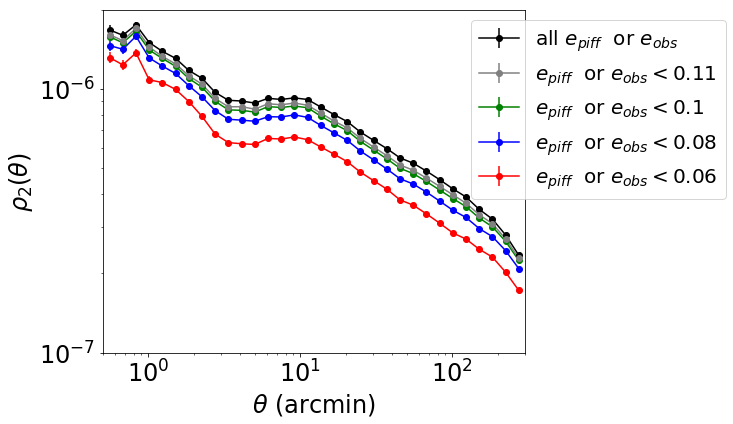

In [120]:
meanr,rho2p, sig_rho2, sqrtn= readrho2fromjson("json/test4/allzones_rho_all_irz.json")
meanr_1,rho2p_1, sig_rho2_1, sqrtn_1 = readrho2fromjson("json/test4/allzones_eorep0.1_rho_all_irz.json")
meanr_2,rho2p_2, sig_rho2_2, sqrtn_2 = readrho2fromjson("json/test4/allzones_eorep0.06_rho_all_irz.json")
meanr_3,rho2p_3, sig_rho2_3, sqrtn_3 = readrho2fromjson("json/test4/allzones_eorep0.08_rho_all_irz.json")
meanr_4,rho2p_4, sig_rho2_4, sqrtn_4 = readrho2fromjson("json/test4/allzones_eorep0.11_rho_all_irz.json")

%matplotlib inline
import matplotlib.pyplot as plt
fig=plt.figure(1,figsize=(12,6))

pretty_rho2(meanr, rho2p, sig_rho2, sqrtn,figcolor='black')
pretty_rho2(meanr_1, rho2p_1, sig_rho2_1, sqrtn_1,figcolor='green')
pretty_rho2(meanr_2, rho2p_2, sig_rho2_2, sqrtn_2,figcolor='red')
pretty_rho2(meanr_3, rho2p_3, sig_rho2_3, sqrtn_3,figcolor='blue')
pretty_rho2(meanr_4, rho2p_4, sig_rho2_4, sqrtn_3,figcolor='gray')


rho2_line = plt.errorbar(-meanr, rho2p, yerr=sig_rho2, color='black', marker='o')
rho2_line_1 = plt.errorbar(-meanr_1, rho2p_1, yerr=sig_rho2_1, color='green', marker='o')
rho2_line_2 = plt.errorbar(-meanr_2, rho2p_2, yerr=sig_rho2_2, color='red', marker='o')
rho2_line_3 = plt.errorbar(-meanr_3, rho2p_3, yerr=sig_rho2_3, color='blue', marker='o')
rho2_line_4 = plt.errorbar(-meanr_4, rho2p_4, yerr=sig_rho2_4, color='gray', marker='o')

plt.legend([rho2_line, rho2_line_4, rho2_line_1, rho2_line_3 , rho2_line_2  ],
           ['all 'r'$e_{piff}$ 'r' or 'r'$e_{obs}$', r'$e_{piff}$ 'r' or 'r'$e_{obs}<0.11$',
            r'$e_{piff}$ 'r' or 'r'$e_{obs}<0.1$', 
            r'$e_{piff}$ 'r' or 'r'$e_{obs}<0.08$',r'$e_{piff}$ 'r' or 'r'$e_{obs}<0.06$'], 
           loc='upper right', fontsize=20, bbox_to_anchor=(1.5,1.0))#bbox_to_anchor=(0.5,-0.1)
plt.ylim( [1.e-7, 2.e-6] )   
plt.tick_params(axis='both', which='major', labelsize=24)
plt.xlim( [0.5,300.] )
plt.xlabel(r'$\theta$ (arcmin)', fontsize=24)
plt.ylabel(r'$\rho_{2}(\theta)$', fontsize=24)
plt.xscale('log')
plt.yscale('log', nonposy='clip')
plt.tight_layout()
plt.savefig('rho2p_y3a1-v29_throwing_away_epifforeobs.pdf', dpi=150)

## RHO2 Blacklisting exposures depending on his observed ellipticity

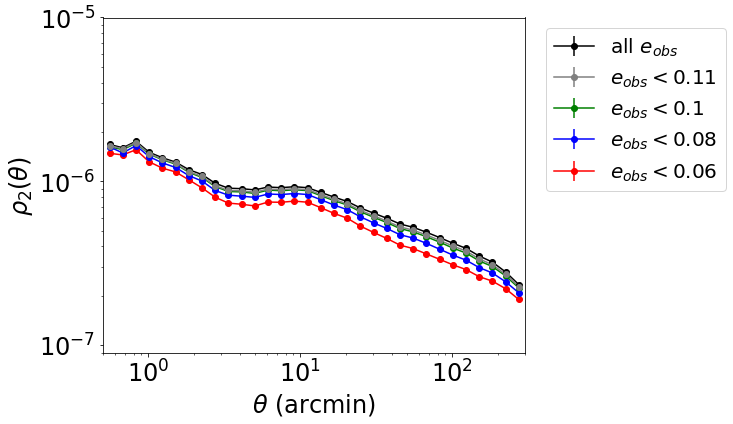

In [87]:
meanr,rho2p, sig_rho2, sqrtn= readrho2fromjson("json/test1/allzones_rho_all_irz.json")
meanr_1,rho2p_1, sig_rho2_1, sqrtn_1 = readrho2fromjson("json/test1/y3a1_exps_e0.1_rho_all_irz.json")
meanr_2,rho2p_2, sig_rho2_2, sqrtn_2 = readrho2fromjson("json/test1/y3a1_exps_e0.06_rho_all_irz.json")
meanr_3,rho2p_3, sig_rho2_3, sqrtn_3 = readrho2fromjson("json/test1/y3a1_exps_e0.08_rho_all_irz.json")
meanr_4,rho2p_4, sig_rho2_4, sqrtn_4 = readrho2fromjson("json/test1/y3a1_exps_e0.11_rho_all_irz.json")
%matplotlib inline
import matplotlib.pyplot as plt
fig=plt.figure(1,figsize=(12,6))

pretty_rho2(meanr, rho2p, sig_rho2, sqrtn,figcolor='black')
pretty_rho2(meanr_1, rho2p_1, sig_rho2_1, sqrtn_1,figcolor='green')
pretty_rho2(meanr_2, rho2p_2, sig_rho2_2, sqrtn_2,figcolor='red')
pretty_rho2(meanr_3, rho2p_3, sig_rho2_3, sqrtn_3,figcolor='blue')
pretty_rho2(meanr_4, rho2p_4, sig_rho2_4, sqrtn_3,figcolor='gray')


rho2_line = plt.errorbar(-meanr, rho2p, yerr=sig_rho2, color='black', marker='o')
rho2_line_1 = plt.errorbar(-meanr_1, rho2p_1, yerr=sig_rho2_1, color='green', marker='o')
rho2_line_2 = plt.errorbar(-meanr_2, rho2p_2, yerr=sig_rho2_2, color='red', marker='o')
rho2_line_3 = plt.errorbar(-meanr_3, rho2p_3, yerr=sig_rho2_3, color='blue', marker='o')
rho2_line_4 = plt.errorbar(-meanr_4, rho2p_4, yerr=sig_rho2_4, color='gray', marker='o')

plt.legend([rho2_line, rho2_line_4, rho2_line_1, rho2_line_3 , rho2_line_2  ],
           ['all '+r'$e_{obs}$', r'$e_{obs}<0.11$',r'$e_{obs}<0.1$', r'$e_{obs}<0.08$',r'$e_{obs}<0.06$'], 
           loc='upper right', fontsize=20, bbox_to_anchor=(1.5,1.0))#bbox_to_anchor=(0.5,-0.1)
plt.ylim( [9.e-8, 1.e-5] )   
plt.tick_params(axis='both', which='major', labelsize=24)
plt.xlim( [0.5,300.] )
plt.xlabel(r'$\theta$ (arcmin)', fontsize=24)
plt.ylabel(r'$\rho_{2}(\theta)$', fontsize=24)
plt.xscale('log')
plt.yscale('log', nonposy='clip')
plt.tight_layout()
#plt.savefig('rho2p_y3a1-v29_blacklisting_exps.pdf', dpi=150) 

## RHO2 desconsidering ccds depending on its mean observed ellipticities

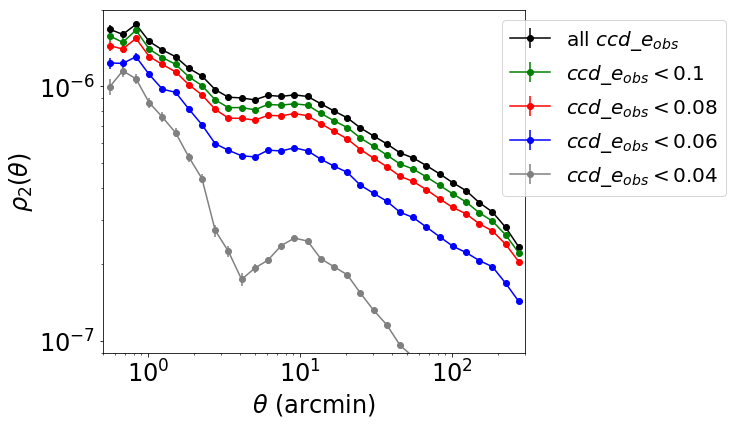

In [121]:
%matplotlib inline
import matplotlib.pyplot as plt

meanr,rho2p, sig_rho2, sqrtn= readrho2fromjson("json/test3/allzones_rho_all_irz.json")
meanr_1,rho2p_1, sig_rho2_1, sqrtn_1 = readrho2fromjson("json/test3/allzones_ccd_eo0.1_rho_all_irz.json")
meanr_2,rho2p_2, sig_rho2_2, sqrtn_2 = readrho2fromjson("json/test3/allzones_ccd_eo0.08_rho_all_irz.json")
meanr_3,rho2p_3, sig_rho2_3, sqrtn_3 = readrho2fromjson("json/test3/allzones_ccd_eo0.06_rho_all_irz.json")
meanr_4,rho2p_4, sig_rho2_4, sqrtn_4 = readrho2fromjson("json/test3/allzones_ccd_eo0.04_rho_all_irz.json")

fig=plt.figure(1,figsize=(12,6))

pretty_rho2(meanr, rho2p, sig_rho2, sqrtn,figcolor='black')
pretty_rho2(meanr_1, rho2p_1, sig_rho2_1, sqrtn_1,figcolor='green')
pretty_rho2(meanr_2, rho2p_2, sig_rho2_2, sqrtn_2,figcolor='red')
pretty_rho2(meanr_3, rho2p_3, sig_rho2_3, sqrtn_3,figcolor='blue')
pretty_rho2(meanr_4, rho2p_4, sig_rho2_4, sqrtn_3,figcolor='gray')


rho2_line = plt.errorbar(-meanr, rho2p, yerr=sig_rho2, color='black', marker='o')
rho2_line_1 = plt.errorbar(-meanr_1, rho2p_1, yerr=sig_rho2_1, color='green', marker='o')
rho2_line_2 = plt.errorbar(-meanr_2, rho2p_2, yerr=sig_rho2_2, color='red', marker='o')
rho2_line_3 = plt.errorbar(-meanr_3, rho2p_3, yerr=sig_rho2_3, color='blue', marker='o')
rho2_line_4 = plt.errorbar(-meanr_4, rho2p_4, yerr=sig_rho2_4, color='gray', marker='o')

plt.legend([rho2_line, rho2_line_1, rho2_line_2, rho2_line_3 , rho2_line_4  ],
           ['all '+r'$ccd\_e_{obs}$', r'$ccd\_e_{obs}<0.1$',r'$ccd\_e_{obs}<0.08$', 
            r'$ccd\_e_{obs}<0.06$',r'$ccd\_e_{obs}<0.04$'], loc='upper right', fontsize=20, 
           bbox_to_anchor=(1.5,1.0))#bbox_to_anchor=(0.5,-0.1)
plt.ylim( [9.e-8, 2.e-6] )   
plt.tick_params(axis='both', which='major', labelsize=24)
plt.xlim( [0.5,300.] )
plt.xlabel(r'$\theta$ (arcmin)', fontsize=24)
plt.ylabel(r'$\rho_{2}(\theta)$', fontsize=24)
plt.xscale('log')
plt.yscale('log', nonposy='clip')
plt.tight_layout()
plt.savefig('rho2p_y3a1-v29_neglectingccdsbyeobs.pdf', dpi=150)

## RHO2 desconsidering ccds from exposures depending on its mean observed ellipticities

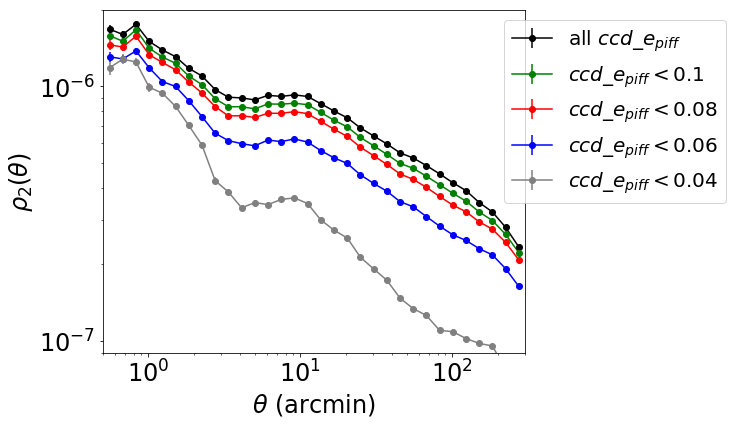

In [122]:
%matplotlib inline
import matplotlib.pyplot as plt

meanr,rho2p, sig_rho2, sqrtn= readrho2fromjson("json/test3b/allzones_rho_all_irz.json")
meanr_1,rho2p_1, sig_rho2_1, sqrtn_1 = readrho2fromjson("json/test3b/allzones_ccd_epiff0.1_rho_all_irz.json")
meanr_2,rho2p_2, sig_rho2_2, sqrtn_2 = readrho2fromjson("json/test3b/allzones_ccd_epiff0.08_rho_all_irz.json")
meanr_3,rho2p_3, sig_rho2_3, sqrtn_3 = readrho2fromjson("json/test3b/allzones_ccd_epiff0.06_rho_all_irz.json")
meanr_4,rho2p_4, sig_rho2_4, sqrtn_4 = readrho2fromjson("json/test3b/allzones_ccd_epiff0.04_rho_all_irz.json")

fig=plt.figure(1,figsize=(12,6))

pretty_rho2(meanr, rho2p, sig_rho2, sqrtn,figcolor='black')
pretty_rho2(meanr_1, rho2p_1, sig_rho2_1, sqrtn_1,figcolor='green')
pretty_rho2(meanr_2, rho2p_2, sig_rho2_2, sqrtn_2,figcolor='red')
pretty_rho2(meanr_3, rho2p_3, sig_rho2_3, sqrtn_3,figcolor='blue')
pretty_rho2(meanr_4, rho2p_4, sig_rho2_4, sqrtn_3,figcolor='gray')


rho2_line = plt.errorbar(-meanr, rho2p, yerr=sig_rho2, color='black', marker='o')
rho2_line_1 = plt.errorbar(-meanr_1, rho2p_1, yerr=sig_rho2_1, color='green', marker='o')
rho2_line_2 = plt.errorbar(-meanr_2, rho2p_2, yerr=sig_rho2_2, color='red', marker='o')
rho2_line_3 = plt.errorbar(-meanr_3, rho2p_3, yerr=sig_rho2_3, color='blue', marker='o')
rho2_line_4 = plt.errorbar(-meanr_4, rho2p_4, yerr=sig_rho2_4, color='gray', marker='o')

plt.legend([rho2_line, rho2_line_1, rho2_line_2, rho2_line_3 , rho2_line_4  ],
           ['all '+r'$ccd\_e_{piff}$', r'$ccd\_e_{piff}<0.1$',r'$ccd\_e_{piff}<0.08$', 
            r'$ccd\_e_{piff}<0.06$',r'$ccd\_e_{piff}<0.04$'], loc='upper right', fontsize=20, 
           bbox_to_anchor=(1.5,1.0))#bbox_to_anchor=(0.5,-0.1)
plt.ylim( [9.e-8, 2.e-6] )   
plt.tick_params(axis='both', which='major', labelsize=24)
plt.xlim( [0.5,300.] )
plt.xlabel(r'$\theta$ (arcmin)', fontsize=24)
plt.ylabel(r'$\rho_{2}(\theta)$', fontsize=24)
plt.xscale('log')
plt.yscale('log', nonposy='clip')
plt.tight_layout()
plt.savefig('rho2p_y3a1-v29_neglectingccdsbyepiff.pdf', dpi=150)